<a href="https://colab.research.google.com/github/ninadcpa/dsc530/blob/main/Wee7_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 - Exercise 1

Author - Ninad Patkhedkar

In [3]:
from google.colab import drive
import sys
import os

# This code is to just use code checked out from github on google drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')
os.chdir('/content/drive/MyDrive/Colab Notebooks/ThinkStats/ThinkStats2/code/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from __future__ import print_function

import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2

def ScatterPlot(ages, weights, alpha=1.0):
    """Make a scatter plot and save it.
    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)


def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.
    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

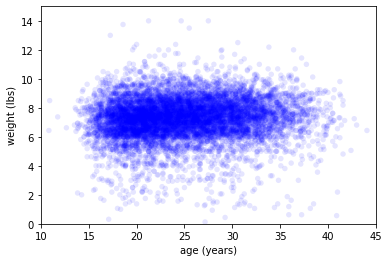

In [18]:
thinkstats2.RandomSeed(29)
    
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    

ages = live.agepreg
weights = live.totalwgt_lb

ScatterPlot(ages, weights, alpha=0.1)

**Pearson Correlation**

In [15]:
thinkstats2.Corr(ages, weights)

0.06883397035410904

**Spearman Correlation**

In [16]:
thinkstats2.SpearmanCorr(ages, weights)

0.09461004109658226

**Plot for percentiles of birth weight against mother's age**

Plot for percentiles of birth weight against mother's age


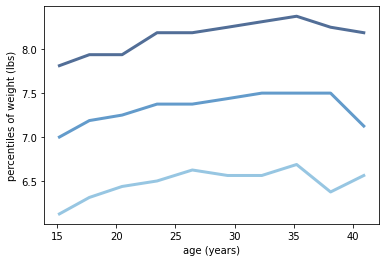

In [14]:
BinnedPercentiles(live)

**Conclusions**

1) The scatterplot shows a weak relationship between the variables.
2) The correlations support this.  Pearson's is around 0.07, Spearman's
is around 0.09.  The difference between them suggests some influence
of outliers or a non-linear relationsip.
3) Plotting percentiles of weight versus age suggests that the
relationship is non-linear.  